# importing necessary libraries

In [4]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Reading data sets from local system in paragraph which is in csv file

In [2]:
medium_data=pd.read_csv("medium_data.csv")

In [17]:
len(medium_data["title"])

6508

In [6]:
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace('\u200a',' '))

# Tokenzation
### Tokenzaion is the process in which we provide an unique id to all the words and make a word index or we can         say vocabulary.

In [7]:
tokenizer = Tokenizer(oov_token='<oov>') # For those words which are not found in word_index
tokenizer.fit_on_texts(medium_data['title'])
total_words = len(tokenizer.word_index) + 1

In [12]:
tokenizer.word_index

{'<oov>': 1,
 'to': 2,
 'the': 3,
 'strong': 4,
 'a': 5,
 'of': 6,
 'how': 7,
 'and': 8,
 'in': 9,
 'your': 10,
 'markup': 11,
 'for': 12,
 'you': 13,
 'with': 14,
 'is': 15,
 '—': 16,
 'data': 17,
 'why': 18,
 'class': 19,
 'h3': 20,
 'i': 21,
 'what': 22,
 'on': 23,
 'learning': 24,
 'from': 25,
 'an': 26,
 'be': 27,
 'my': 28,
 'writing': 29,
 'are': 30,
 'it': 31,
 'can': 32,
 'using': 33,
 'design': 34,
 'machine': 35,
 'ux': 36,
 'about': 37,
 'do': 38,
 'not': 39,
 'python': 40,
 'ai': 41,
 'life': 42,
 'that': 43,
 'when': 44,
 'should': 45,
 'we': 46,
 '5': 47,
 'science': 48,
 'make': 49,
 'time': 50,
 'need': 51,
 'as': 52,
 '3': 53,
 'more': 54,
 'at': 55,
 'business': 56,
 'or': 57,
 'part': 58,
 'have': 59,
 'work': 60,
 'new': 61,
 'don’t': 62,
 'up': 63,
 'by': 64,
 'write': 65,
 'get': 66,
 'use': 67,
 'guide': 68,
 'will': 69,
 'marketing': 70,
 '1': 71,
 'ways': 72,
 'deep': 73,
 'best': 74,
 'analysis': 75,
 'first': 76,
 '2019': 77,
 'product': 78,
 'better': 79,
 

# converting each paragraph into token and then indexing it and make combination of n-gram

In [18]:
input_sequences = []
for line in medium_data['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))
    

[5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99]
[1858, 23, 741, 81, 103, 14, 345, 345, 1859]
[7, 2, 67, 3654, 9, 40]
[3655, 7, 2, 266, 1283, 9, 2456, 23, 10, 938, 222]
[5, 192, 64, 192, 485, 6, 1860, 1284, 8, 1519]
[26, 197, 120, 2, 428, 12, 17, 327]
[1520, 296, 3656]
[120, 2, 3657, 742, 2457, 743, 312]
[386, 230, 1861, 15, 3, 74, 55, 406]
[22, 93, 41, 99, 175, 939, 197]
[107, 19, 11, 107, 11, 20, 107, 22, 21, 104, 25, 274, 50, 826, 3658, 3659, 3660, 107]
[121, 5, 3661, 563, 33, 267]
[105, 5, 3662, 1862, 3663]
[7, 2, 564, 176]
[1088, 2458, 12, 207, 193]
[7, 2, 677, 2459, 565]
[245, 34, 3664, 12, 17, 1863]
[3665, 2460, 53, 2461, 2462, 8, 5, 2461, 743]
[17, 48, 328, 329]
[827, 453, 12, 828, 1864]
[3666, 1865, 829, 78, 678, 30, 3667, 3, 566, 7, 35, 24, 32, 153, 2, 1521, 214]
[1866, 6, 2463, 940, 3668, 6, 3669, 3670, 275, 3671, 8, 275, 3672]
[4, 19, 11, 4, 11, 20, 4, 7, 17, 346, 830, 1867, 5, 297, 485, 6, 744, 207, 941, 4]
[4, 19, 11, 4, 11, 20, 4, 1089, 23, 679, 57, 679, 23, 1089, 3, 1868,

# Make all titles with same length by using padding
### The length of every title has to be the same. To make it, we need to find a title that has a maximum length, and based on that length, we have to pad rest of titles.

In [31]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# prepaaring data for model training as input and level

In [20]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# training model with the help of Bidirectional(LSTM(150))

In [21]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1)
#print model.summary()
print(model)

C:\Users\SHYAM\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
1515/1515 [==============================] - 293s 188ms/step - loss: 6.7573 - accuracy: 0.1266
Epoch 2/50
1515/1515 [==============================] - 269s 178ms/step - loss: 5.7539 - accuracy: 0.1801
Epoch 3/50
1515/1515 [==============================] - 280s 185ms/step - loss: 4.9614 - accuracy: 0.2066
Epoch 4/50
1515/1515 [==============================] - 277s 183ms/step - loss: 4.2377 - accuracy: 0.2484
Epoch 5/50
1515/1515 [==============================] - 273s 180ms/step - loss: 3.6979 - accuracy: 0.2984
Epoch 6/50
1515/1515 [==============================] - 281s 185ms/step - loss: 3.3391 - accuracy: 0.3374
Epoch 7/50
1515/1515 [==============================] - 276s 182ms/step - loss: 3.1041 - accuracy: 0.3627
Epoch 8/50
1515/1515 [==============================] - 271s 179ms/step - loss: 2.9554 - accuracy: 0.3816
Epoch 9/50
1515/1515 [==============================] - 275s 182ms/step - loss: 2.8021 - accuracy: 0.4033
Epoch 10/50
1515/1515 [=======================

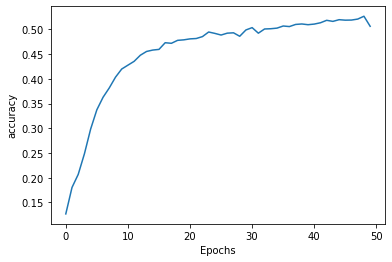

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

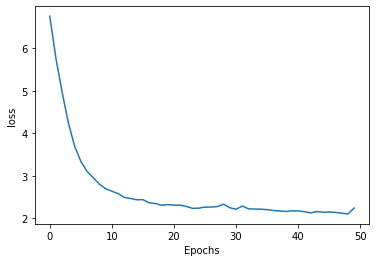

In [24]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

# sample testing

In [33]:
original_text="How to Start a Motorcycle Ride sharing Company inÂ Nigeria"
seed_text = "How to Start a Motorcycle"
next_words = 2
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    classes_x=np.argmax(predicted,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == classes_x:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

How to Start a Motorcycle ride sharing
